# 有益的探索

## 数据类型的底层实现

### 从奇怪的列表说起

1、错综复杂的复制

In [1]:
list_1 = [1, [22, 33, 44], (5, 6, 7), {'name': 'Sarah'}]

In [2]:
# 浅拷贝

# list_3 = list_1                # 错误
list_2 = list_1.copy()           # 或者list_1[:] \ lsit(lsit_1)均可实现浅拷贝

In [3]:
# 对浅拷贝前后两列表分别进行操作

list_2[1].append(55)

print('list_1: ', list_1)
print('list_2: ', list_2)

# 浅拷贝只是拷贝了地址

list_1:  [1, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}]
list_2:  [1, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}]


2、列表的底层实现

引用数组概念  

列表内的元素可以分散的存储在内存中

列表存储的，实际上是这些元素的地址！！！—————地址的存储在内存中是连续的

（1）新增元素

In [4]:
list_1.append(100)
list_2.append('n')

print('list_1: ', list_1)
print('list_2: ', list_2)

list_1:  [1, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}, 100]
list_2:  [1, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}, 'n']


（2）修改元素

In [5]:
list_1[0] = 10
list_2[0] = 20

print('list_1: ', list_1)
print('list_2: ', list_2)

list_1:  [10, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}, 100]
list_2:  [20, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}, 'n']


（3）对列表型元素进行操作

In [6]:
list_1[1].remove(44)
list_2[1] += [55, 66]

print('list_1: ', list_1)
print('list_2: ', list_2)

# 列表的地址 是 地址列表，是一串

list_1:  [10, [22, 33, 55, 55, 66], (5, 6, 7), {'name': 'Sarah'}, 100]
list_2:  [20, [22, 33, 55, 55, 66], (5, 6, 7), {'name': 'Sarah'}, 'n']


（4）对元组型元素进行操作

In [8]:
list_2[2] += (8,9)

print('list_1: ', list_1)
print('list_2: ', list_2)

# 元组的地址 也是 地址元组，也是一串
# 但元组不可变，所以会生成一个 新的地址元组

list_1:  [10, [22, 33, 55, 55, 66], (5, 6, 7), {'name': 'Sarah'}, 100]
list_2:  [20, [22, 33, 55, 55, 66], (5, 6, 7, 8, 9), {'name': 'Sarah'}, 'n']


**元组是不可变的！！！**

（5）对字典型元素进行操作

In [9]:
list_1[-2]['age'] = 18

print('list_1: ', list_1)
print('list_2: ', list_2)

# 字典是通过 散列表 存储的

list_1:  [10, [22, 33, 55, 55, 66], (5, 6, 7), {'name': 'Sarah', 'age': 18}, 100]
list_2:  [20, [22, 33, 55, 55, 66], (5, 6, 7, 8, 9), {'name': 'Sarah', 'age': 18}, 'n']


3、引入深拷贝

浅拷贝之后
- 针对不可变元素（数字、字符串、元组）的操作，都各自生效了
- 针对不可变元素（列表、集合）的操作，发生了一些混淆

引入深拷贝
- 深拷贝将所有层级的相关元素全部复制，完全分开，泾渭分明，避免了上述问题

In [10]:
import copy

list_1 = [1, [22, 33, 44], (5, 6, 7), {'name': 'Sarah'}]
list_2 = copy.deepcopy(list_1)
list_1[-1]['age'] = 18
list_2[1].append(55)

print('list_1: ', list_1)
print('list_2: ', list_2)

list_1:  [1, [22, 33, 44], (5, 6, 7), {'name': 'Sarah', 'age': 18}]
list_2:  [1, [22, 33, 44, 55], (5, 6, 7), {'name': 'Sarah'}]


### 神秘的字典

1、快速的查找

In [11]:
import time

ls_1 = list(range(1000000))
ls_2 = list(range(500))+[-10]*500

start = time.time()
count = 0
for n in ls_2:
    if n in ls_1:
        count += 1
end = time.time()
print('查找{}个元素，在ls_1列表中的有{}个，共用时{}秒。'.format(len(ls_2), count, round((end-start),2)))    

查找1000个元素，在ls_1列表中的有500个，共用时5.51秒。


In [13]:
import time

d = {i:i for i in range(1000000)}
ls_2 = list(range(500))+[-10]*500

start = time.time()
count = 0
for n in ls_2:
    try:
        d[n]
    except:
        pass
    else:
        count += 1
end = time.time()
print('查找{}个元素，在ls_1列表中的有{}个，共用时{}秒。'.format(len(ls_2), count, round((end-start))))    

查找1000个元素，在ls_1列表中的有500个，共用时0秒。


2、字典的底层实现

通过稀疏数组来实现值的存储与访问

**字典的创建过程**

- 第一步：创建一个散列表（稀疏数组 N>>n）

In [14]:
d = {}

- 第二步：通过 hash() 计算键的散列值

In [17]:
print(hash('Python'))
print(hash(1024))
print(hash((1,2)))

721202377029526252
1024
3713081631934410656


In [18]:
d['age'] = 18      # 增加键值对的操作，首先会计算键的散列值 hash('age')
print(hash('age'))

772815007290302243


- 第三步：根据计算的散列表确定其在散列表中的位置

极个别时候，散列值会发生冲突，则内部有相应的解决冲突的办法

- 第四步：在该位置上存入值

**键值对的访问过程**

In [19]:
d['age']

18

- 第一步：计算要访问的键的散列值

- 第二步：根据计算的散列值，通过一定的规则，确定其在散列表中的位置

- 第三步：读取该位置上存储的值

        如果存在，则返回该值
        如果不存在，则报错KeyError

**小结**

（1）字典数据类型，通过空间换时间，实现了快速的数据查找

- 也就注定了字典的空间利用效率地下

（2）因为散列值对应位置的顺序与键在字典中显示的顺序可能不同，因此表现出来字典是无序的

- 回顾一下 N>>n
  如果 N = n ，会发生很多位置冲突
    
- 思考一下开头的小例子，为什么字典实现了比列表的查找


### 紧凑的字符串

通过紧凑数组实现字符串的存储

- 数据在内存中是连续存放的，效率更高，节省空间

- 思考一下，同为序列类型，为什么列表采用数组，而字符串采用紧凑数组

        列表可变，无法预留相应的地址上的空间；而字符串是字符组成，固定，可预留

**是否可变**

**1、不可变类型：数字、字符串、元组**

在生命周期中保持内容不变

- 换句话说，改变了就不是他自己了（id变了）

- 不可变对象的 += 操作，实际上创建了一个新的对象

In [21]:
x = 1
y = 'Python'

print('x id: ', id(x))
print('y id: ', id(y))

x id:  140732693799760
y id:  1825731268536


In [22]:
x += 2
y += '3.7'

print('x id: ', id(x))
print('y id: ', id(y))

x id:  140732693799824
y id:  1825797647280


**元组并不是总是不可变的**

In [23]:
# 元组内部元素都不可变时，才是不可变！！！

t = (1, [2])
t[1].append(3)

print(t)

(1, [2, 3])


**可变类型：列表、字典、集合**

- id 保持不变，但里面的内容可以变

- 可变对象的 += 操作，实际在原对象的基础上就地修改

In [24]:
ls = [1, 2, 3]
d = {'Name': 'Sarah', 'Age': 18}

print('ls id: ', id(ls))
print('d id: ', id(d))

ls id:  1825788116168
d id:  1825788501376


In [25]:
ls += [4, 5]
d_2 = {'Sex': 'female'}
d.update(d_2)                # 将 d_2 中的元素更新到 d 中

print('ls id: ', id(ls))
print('d id: ', id(d))

ls id:  1825788116168
d id:  1825788501376


### 列表操作的几个小例子

**【例1】删除列表内的特定元素**

- 方法1 存在运算删除法

缺点：每次存在运算，都要从头对列表进行遍历、查找、效率低

In [26]:
alist = ['d', 'd', 'd', '2', '2', 'd', 'd', '4']
s = 'd'
while True:
    if s in alist:
        alist.remove(s)
    else:
        break
print(alist)

['2', '2', '4']


- 方法2 一次性遍历元素执行删除

In [27]:
alist = ['d', 'd', 'd', '2', '2', 'd', 'd', '4']
for s in alist:
    if s is 'd':
        alist.remove(s)           # remove(s) 删除列表中第一次出现的该元素
print(alist)

# 因为列表会缩短，下标变化了
# 然后每次识别出来就启动 remove 删除列表第一个 'd'

['2', '2', 'd', 'd', '4']


解决方法：使用负向索引

In [30]:
alist = ['d', 'd', 'd', '2', '2', 'd', 'd', '4']
for i in range(-len(alist), 0):
    if alist[i] is 'd':
        alist.remove(alist[i])           # remove(s) 删除列表中第一次出现的该元素
print(alist)

['2', '2', '4']


**【例2】多维列表的创建**

In [31]:
ls = [[0]*10]*5
ls

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [32]:
[[0]*10]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [33]:
ls[0][0] = 1
ls

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

## 更加简洁的语法

### 解析语法

In [34]:
ls = [[0]*10 for i in range(5)]
ls

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [35]:
ls[0][0] = 1
ls

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

**1、解析语法的基本结构————以列表解析为例（也称为列表推导）**

[expression **for value in iterable** if condition]

- 三要素：表达式、可迭代对象、if条件（可选）

**执行过程**

（1）从可迭代对象中拿出一个元素

（2）通过if条件（如果有的话），对元素进行筛选
        
        若通过筛选，则将元素传递给表达式

**执行过程**

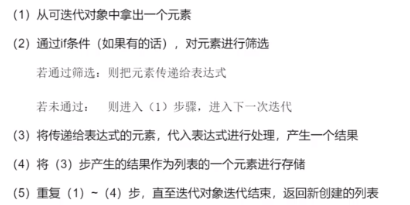

In [ ]:
# 等价于此代码

result = []
for value in iterable:
    if condition:
        result.append(expression)

**【例】求20以内奇数的平方**

In [37]:
squares = []
for i in range(1, 21):
    if i%2 is 1:
        squares.append(i**2)
print(squares)

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]


In [40]:
squares = [i**2 for i in range(1, 21) if i%2 is 1]
print(squares)

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]


**支持多变量**

In [41]:
x = [1, 2, 3]
y = [1, 2, 3]

results = [i*j for i, j in zip(x, y)]
results

[1, 4, 9]

**支持循环嵌套**

In [43]:
colors = ['balck', 'white']
sizes = ['S', 'M', 'L']
tshirts = ['{} {}'.format(color, size) for color in colors for size in sizes]
tshirts

['balck S', 'balck M', 'balck L', 'white S', 'white M', 'white L']

**2、其他解析语法的例子**

- 解析语法构造字典（字典推导）

In [44]:
squares = {i: i**2 for i in range(10)}
for k, v in squares.items():
    print(k, ': ', v)

0 :  0
1 :  1
2 :  4
3 :  9
4 :  16
5 :  25
6 :  36
7 :  49
8 :  64
9 :  81


- 解析语法构造集合（集合推导）

In [45]:
squares = {i**2 for i in range(10)}
squares

{0, 1, 4, 9, 16, 25, 36, 49, 64, 81}

- 生成器表达式

In [46]:
squares = (i**2 for i in range(10))
squares

<generator object <genexpr> at 0x000001A918885C00>

In [47]:
colors = ['balck', 'white']
sizes = ['S', 'M', 'L']
tshirts = ('{} {}'.format(color, size) for color in colors for size in sizes)
for tshirt in tshirts:
    print(tshirt)

balck S
balck M
balck L
white S
white M
white L


### 条件表达式

【例】将变量 n 的绝对值赋值给变量 x

In [48]:
n = 10
if n >= 0:
    x = n 
else:
    x = -n
x

10

In [49]:
n = -10
x = n if n>= 0 else -n
x

10

条件表达式和解析语法简单实用，运行速度相对更快一点

## 三大神器

### 生成器

In [50]:
ls = [i**2 for i in range(1, 1000001)]

In [51]:
for i in ls:
    pass

缺点：占用大量内存

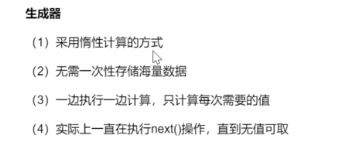

**1、生成器表达式**

- 海量数据，不需存储

In [52]:
squares = (i**2 for i in range(1000000))

In [53]:
for i in squares:
    pass

- 求 0-100 的和

无需显示存储全部数据，节省内存

In [54]:
sum((i for i in range(101)))

5050

**2、生成器函数————yield**

- 生产斐波那契数列

数列前两个元素为 1，1 之后的元素为其前两个元素之和

In [55]:
def fib(max):
    ls = []
    n, a, b = 0, 1, 1
    while n < max:
        ls.append(a)
        a, b = b, a + b
        n = n + 1
    return ls


fib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

中间尝试

In [56]:
def fib(max):
    ls = []
    n, a, b = 0, 1, 1
    while n < max:
        print(a)
        a, b = b, a + b
        n = n + 1


fib(10)

1
1
2
3
5
8
13
21
34
55


构造生成器函数

在每次调用 next() 的时候执行，遇到 yield 语句返回，再次执行时从上次返回的 yield 语句处继续执行

CSDN yield解释帖
https://blog.csdn.net/mieleizhi0522/article/details/82142856/

In [57]:
def fib(max):
    ls = []
    n, a, b = 0, 1, 1
    while n < max:
        yield(a)
        a, b = b, a + b
        n = n + 1


fib(10)

<generator object fib at 0x000001A9199B3048>

In [58]:
for i in fib(10):
    print(i)

1
1
2
3
5
8
13
21
34
55


### 迭代器

**1、可迭代对象**

可直接作用于 for循环 的对象统称为可迭代对象：Iterable 对象

**（1）列表、元组、字符串、字典、集合、文件**

可以使用 isinstance() 判断一个对象是否是 Iterate 对象

In [61]:
from collections.abc import Iterable

isinstance({'name': 'Sarah'}, Iterable)

True

In [62]:
isinstance({'name': 'Sarah'}, Iterable)

True

In [63]:
isinstance('Python', Iterable)

True

**（2）生成器**

In [65]:
squares = (i**2 for i in range(5))
isinstance(squares, Iterable)

True

生成器不但可以用于 for循环， 还可以被 next()函数 调用

In [66]:
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))

# 直到没有数据可取，抛出 StopIteration
print(next(squares))

0
1
4
9
16


StopIteration: 

**可以被 next()函数 调用并不断返回下一个值，直至没有数据可取的对象称为迭代器：Iterator**

**2、迭代器**

可以使用 isinstance() 判断一个对象是否是 Iterator 对象

**（1）生成器都是迭代器**

In [67]:
from collections.abc import Iterator

squares = (i**2 for i in range(5))
isinstance(squares, Iterator)

True

**（2）列表、元组、字符串、字典、集合不是迭代器**

In [68]:
isinstance([1, 2, 3], Iterator)

False

In [69]:
# 可以通过 iter(Iterable) 创建迭代器

isinstance(iter([1, 2, 3]), Iterator)

True

for item in Iterable 等价于:
    
    先通过 iter()函数 获取可迭代对象 Iterable 的迭代器
    
    然后对获取到的迭代器不断调用 next()方法 来获取下一个值并将其赋值给 item
    
    当遇到 StopIteration 的一场后循环结束

**（3）zip、enumerate 等 itertools 里的函数是迭代器**

In [70]:
x = [1, 2]
y = ['a', 'b']
zip(x, y)

In [71]:
for i in zip(x, y):
    print(i)
    
isinstance(zip(x, y), Iterator)

(1, 'a')
(2, 'b')


True

In [72]:
numbers = [1, 2, 3, 4, 5]
enumerate(numbers)

In [73]:
for i in enumerate(numbers):
    print(i)
    
    isinstance(enumerate(numbers), Iterator)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)


**（4）文件是迭代器**

In [74]:
with open('恋曲1980.txt', 'r', encoding = 'utf8') as f:
    print(isinstance(f, Iterator))

True


**（5）迭代器是可耗尽的**

**（6）range() 不是迭代器**

In [75]:
numbers = range(10)
isinstance(numbers, Iterator)

False

In [76]:
print(len(numbers))    # 有 长度
print(numbers[0])      # 可 索引
print(9 in numbers)    # 可 存在计算
next(numbers)          # 不可被 next() 调用

10
0
True


TypeError: 'range' object is not an iterator

In [77]:
for number in numbers:
    print(number)
    
# 可以再次循环

0
1
2
3
4
5
6
7
8
9


**不会被耗尽！！！**

**可以称range()为懒序列**
    
    它是一种序列
    
    但并不包含任何内存中的内容
    
    而是通过计算来回答问题

### 装饰器

**1、需求的提出**

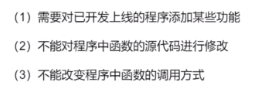

**比如说，要统计每个函数的运行时间**

In [78]:
def f1():
    pass


def f2():
    pass


def f3():
    pass


f1()
f2()
f3()

**没问题，我们有装饰器！！！**

**2、函数对象**

函数是Python中的第一类对象：

（1）可以把函数赋值给变量

（2）对该变量进行调用，可实现原函数的功能

In [79]:
def square(x):
    return x**2

print(type(square))    # square 是 function类 的一个实例

<class 'function'>


In [80]:
pow_2 = square         # 可以理解成给这个函数起了个别名 pow_2
print(pow_2(5))
print(square(5))

25
25


可以将函数作为参数进行传递

**3、高阶函数**

（1）接收函数作为参数

（2）或者返回一个函数

**满足上述条件之一的函数称之为高阶函数**

In [81]:
def square(x):
    return x**2


def pow_2(fun):
    return fun


f = pow_2(square)
f(8)

64

In [82]:
print(f is square)

True


**4、嵌套函数**

**在函数内部定义一个函数**

In [84]:
def outer():
    print('outer is running')
    
    def inner():
        print('inner is running')
        
    inner()
    
    
outer()

outer is running
inner is running


**5、闭包**

In [85]:
def outer():
    x = 1
    z = 10
    
    def inner():
        y = x+100
        return y, z
    
    return inner


f = outer()               # 实际上包含了 inner函数本身+outer函数的环境
print(f)

<function outer.<locals>.inner at 0x000001A91FD6DA60>


In [86]:
print(f.__closure__)           # __closure__属性中包含了来自外部函数的信息
for i in f.__closure__:
    print(i.cell_contents)

(<cell at 0x000001A91FC8E438: int object at 0x00007FFEE238E350>, <cell at 0x000001A91FC8E678: int object at 0x00007FFEE238E470>)
1
10


In [89]:
res = f()
print(res)
print(outer()())

(101, 10)
(101, 10)


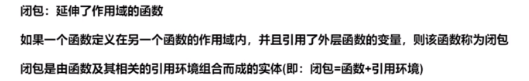

- 一旦在内层函数重新定义了相同名字的变量， 则变量成为局部变量

In [90]:
def outer():
    x = 1
    
    def inner():
        x = x+100
        return x
    
    return inner


f = outer()
f()

UnboundLocalError: local variable 'x' referenced before assignment

nonlocla 允许内嵌的函数来修改闭包变量

In [91]:
def outer():
    x = 1
    
    def inner():
        nonlocal x
        x = x+100
        return x
    
    return inner


f = outer()
f()

101

**6、一个简单的装饰器**

**嵌套函数实现**

In [94]:
import time

def timer(func):
    
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        
    return inner


def f1():
    print('f1 run')
    time.sleep(1)
    
    
    
f1 = timer(f1)          # 包含 inner() 和 timer的环境，如传递过来的 参数func
f1()                    # 注意 return 的是 inner，其实就是 inner()且附带环境变量

inner run
f1 run
f1 函数运行用时1.00秒


**语法糖**

In [95]:
import time

def timer(func):
    
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        
    return inner

@timer                       # 相当于实现了 f1 = timer(f1)
def f1():
    print('f1 run')
    time.sleep(1)
    
    
    
f1()

inner run
f1 run
f1 函数运行用时1.00秒


**7、装饰有参函数**

In [98]:
# 被修饰的有参数

import time

def timer(func):
    
    def inner(*args, **kwargs):         # *args接收任意多普通参数, **kwargs接收任意多字典参数 https://www.cnblogs.com/cwind/p/8996000.html
        print('inner run')
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        
    return inner

@timer                       # 相当于实现了 f1 = timer(f1)
def f1(n):                   # 原函数要用参数，就可以采用 *args,**kwargs
    print('f1 run')
    time.sleep(n)
    
    
    
f1(2)

inner run
f1 run
f1 函数运行用时2.00秒


**被装饰函数有返回值的情况**

In [100]:
# 被修饰的有参数

import time

def timer(func):
    
    def inner(*args, **kwargs):         # *args接收任意多普通参数, **kwargs接收任意多字典参数 https://www.cnblogs.com/cwind/p/8996000.html
        print('inner run')
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        return res
        
    return inner

@timer                       # 相当于实现了 f1 = timer(f1)
def f1(n):                   # 原函数要用参数，就可以采用 *args,**kwargs
    print('f1 run')
    time.sleep(n)
    return 'wake up'
    
    
res = f1(2)
print(res)

inner run
f1 run
f1 函数运行用时2.00秒
wake up


**8、带参数的装饰器**

装饰器本身要传递一些额外参数

- 需求：有时需要统计绝对时间，有时需要统计绝对时间的2倍

In [104]:
import time

def timer(method):
    
    def outer(func):
    
        def inner(*args, **kwargs):         # *args接收任意多普通参数, **kwargs接收任意多字典参数 https://www.cnblogs.com/cwind/p/8996000.html
            print('inner run')
            if method is 'origin':
                print('origin_inner run')
                start = time.time()
                res = func(*args, **kwargs)
                end = time.time()
                print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
            elif method is 'double':
                print('double_inner run')
                start = time.time()
                res = func(*args, **kwargs)
                end = time.time()
                print('{} 函数运行用时{:.2f}秒'.format(func.__name__, 2*(end-start)))
            return res
        
        return inner

    return outer


@timer(method='origin')      # 相当于 timer = timer(method = 'origin')  f1 = timer(f1)  # f1 对应的是 inner; timer(f1)的 f1 对应的是 outer
def f1():                   # 原函数要用参数，就可以采用 *args,**kwargs
    print('f1 run')
    time.sleep(1)


@timer(method='double')
def f2():
    print('f2 run')
    time.sleep(1)
    
    
f1()
print()                      # 加个空行 ：）
f2()

inner run
origin_inner run
f1 run
f1 函数运行用时1.00秒

inner run
double_inner run
f2 run
f2 函数运行用时2.00秒


**9、何时执行装饰器**

- 一装饰就执行，不必等调用

In [105]:
func_names = []
def find_function(func):
    print('run')
    func_names.append(func)
    return func


@find_function
def f1():
    print('f1 run')
    
    
@find_function
def f2():
    print('f2 run')
    
    
@find_function
def f3():
    print('f3 run')
    
    
#for func in func_names:
     #func()

run
run
run


In [106]:
for func in func_names:
    print(func.__name__)
    func()
    print()

f1
f1 run

f2
f2 run

f3
f3 run



In [107]:
print(func_names)

[<function f1 at 0x000001A91F3441E0>, <function f2 at 0x000001A91F344F28>, <function f3 at 0x000001A91F344C80>]


**10、回归本源**

- 原函数的属性被掩盖了

In [108]:
import time

def timer(func):
    
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        
    return inner

@timer                       # 相当于实现了 f1 = timer(f1)
def f1():
    print('f1 run')
    time.sleep(1)
    
    
    
print(f1.__name__)

inner


- 回来

In [110]:
import time
from functools import wraps

def timer(func):
    @wraps(func)
    def inner():
        print('inner run')
        start = time.time()
        func()
        end = time.time()
        print('{} 函数运行用时{:.2f}秒'.format(func.__name__, (end-start)))
        
    return inner

@timer                       # 相当于实现了 f1 = timer(f1)
def f1():
    print('f1 run')
    time.sleep(1)
    
    
print(f1.__name__)
print()
f1()

f1

inner run
f1 run
f1 函数运行用时1.00秒


# 题目

## 题目一 简答题（数据类型的底层实现）

以下两段程序分别会输出怎样的结果？请运行验证，并给出理由

代码1：

In [111]:
def f1(ls=[]):
    ls.append(1)
    return ls


print(f1())
print(f1())
print(f1())

[1]
[1, 1]
[1, 1, 1]


代码2：

In [113]:
person = {'name': '', 'id': 0}
team = []

for i in range(3):
    x = person
    x['id'] = i
    team.append(x)
    

team[0]['name'] = 'Peter'
team[1]['name'] = 'Tom'
team[2]['name'] = 'Mary'

print(team[1])
print(team)

{'name': 'Mary', 'id': 2}
[{'name': 'Mary', 'id': 2}, {'name': 'Mary', 'id': 2}, {'name': 'Mary', 'id': 2}]


## 题目二 编程题（更加简洁的语法）

### 1、用列表推导实现一个过滤器

- 实现一个判断数字 n 是否为素数的函数 isprime(n)

In [114]:
from math import sqrt

def isprime(num):
    if num is 1:
        return False
    for i in range(2, int(sqrt(num)) + 1):
            if num%i is 0:
                return False
    return True

In [115]:
# 用列表推导获得100以内的素数列表

[i for i in range(1, 100) if isprime(i)]

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### 2、用列表推导实现两列表对应元素的操作

- 获得新列表 z，列表内元素

z[i] = pow(x[i], y[i])

x = [1, 2, 3, 4]

y = [0, 2, 3, 1]

In [116]:
from math import pow

x = [1, 2, 3, 4]
y = [0, 2, 3, 1]
z = [pow(x[i], y[i]) for i in range(len(x))]
z

[1.0, 4.0, 27.0, 4.0]

### 3、使用条件表达式，将 x, y 中的最大值赋值给 z

In [117]:
x, y = 10, 20

max = x if x > y else y
max

20

## 题目三 编程题（三大神器）

### 1、构造一个生产 n 以内的素数生成器， 与编程题2-1 进行相互验证

**这个是逐渐删除 素数的倍数 最后得到素数列表！！！**

埃氏素数生成法(埃拉托斯特尼筛法)：https://www.jianshu.com/p/4c6253653b4c

Python实现：https://blog.csdn.net/andy_super/article/details/80937770

In [119]:
# -*- coding: utf-8 -*-

# 埃氏筛法计算素数
# 简单地讲，yield 的作用就是把一个函数变成一个 generator

def _odd_list():
    """奇数生成器（不包括1）生成的是一个无限序列"""
    n = 1
    while True:
        n += 2
        yield n

        
def filter_not_prime(n):
    """过滤因子（筛选函数），保留不能整除的，筛掉可以整除的，即倍数"""
    return lambda x : x % n > 0


def primes():
    """生成素数序列"""
    yield 2
    it = _odd_list()    #初始序列
    while True:
        n = next(it)
        yield n
        it = filter(filter_not_prime(n), it)    #it在不断的next调用中，进行筛选。

        
def is_prime(num):
    """遍历素数生成器"""
    for i, x in enumerate(primes()):    # enumerate迭代遍历键值对（索引：素数）
        if x > num:
            #if i > num
            break
        else:
            print(x)
        
        
def run():
    is_prime(100)
    

if __name__ is '__main__':
    run()

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


### 2、某大型购物网站进行中秋优惠促销活动，请在不改变原计费函数 charge() 的基础上，输出“中秋节快乐！”，并实现总价打 8折 的优惠

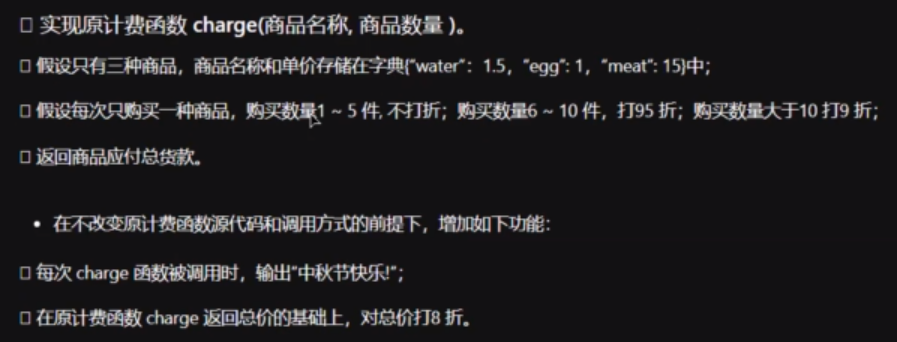

In [120]:
goods = {'water': 1.5, 'egg': 1, 'meat': 15}

In [121]:
def charge(goods_name, goods_count):
    """购物计费"""
    cost = goods[goods_name] * goods_count
    if goods_count in range(6):
        return cost
    elif goods_count in range(11):
        return cost * 0.95
    elif goods_count > 10:
        return cost * 0.9
    
    
def shop(goods_name, goods_count):
    print('中秋节快乐！')
    return charge(goods_name, goods_count) * 0.8


cost = shop('water', 3)
cost

中秋节快乐！


3.6

In [126]:
from functools import wraps


def mid_autumn(func):
    @wraps(func)
    def shop(goods_name, goods_count):
        print('中秋节快乐！')
        cost = func(goods_name, goods_count) * 0.8
        return cost
    
    return shop
    
@mid_autumn
def charge(goods_name, goods_count):
    """购物计费"""
    cost = goods[goods_name] * goods_count
    if goods_count in range(6):
        return cost
    elif goods_count in range(11):
        return cost * 0.95
    elif goods_count > 10:
        return cost * 0.9
    
    
cost = charge('water', 3)
cost

中秋节快乐！


3.6